In [1]:
from IPython.display import SVG, Image
import numpy as np

- reference
    - Bandit based Monte-Carlo Planning：http://ggp.stanford.edu/readings/uct.pdf

In [2]:
Image(url='../../../imgs/2880px-MCTS_(English).svg.png', width=600)

In [4]:
C = np.sqrt(2)
# level 1 select
print(7/10 + C*np.sqrt(np.log(21)/10))
print(5/8 + C*np.sqrt(np.log(21)/8))
print(0/3 + C*np.sqrt(np.log(21)/3))

1.4803233224405667
1.4974279967027972
1.4246689528269185


## outline

- MCTS 
    - statistical（monte carlo） tree
    - Node：刻画/表示的是 state
    - edge: 刻画的是 action 导致的 state transition
- Select 选择的是 leaf node（从 leaf node 中选择，）
    - 所谓的 leaf node：就是没有 children 的 node，比如初始状态的 root node 就没有 children；
    - select 的依据是 UCT (UCB1 vs. UCT)
        - The main idea in this paper it to apply a particular bandit algorithm, UCB1 (UCB stands for Upper Confidence Bounds), for rollout-based Monte-Carlo planning. The new algorithm, called UCT (UCB applied to trees) described in Section 2 is called UCT.
    - 随着 tree 的展开及update，后续 select 的过程就是一个 tree traversal 的过程；
- Expand & Simulate (rollout, random simulate）
    - expand：leaf node 展开其 children，产生children的过程
        - 对于围棋的初始 root 状态，展开就是 19*19=361 个可能的children；
    - simulate：最能体现 monte carlo 思想的步骤
        - 搜索树的每个节点，算法会进行多次随机模拟
        - in order to find a value；
        - 从当前状态出发，按照某种策略（可能是完全随机的，也可能是某种启发式的策略）执行到游戏结束或达到某个深度限制。这些模拟的结果（胜 win、负 lose、平等 draw）被用来估算从当前节点出发的期望得分。

    - 什么时候需要rollout，节点是全新（没有被 simulate）的时候；
        - new node ＝> rollout ($n_i=0$)
        - old node ＝> expand （已经被update (simulate -> bp)过）

- Backpropagate：对 node 的更新一直向上传（找其父节点）
    - 基于 rollout 找到的 value，
    - 每对一个node完成simulate，因为涉及到 bp，一直沿着 parent node，更新到 root 节点；
        - select 的过程，UCB 都需要重新计算；

$$
\begin{split}
&\text{UCB1}(s_i)=\frac{w_i}{n_i} + C\sqrt{\frac{\ln N_i}{n_i}}, \quad \\
&\text{UCB1}(s_i)=\bar v_i + C\sqrt{\frac{\ln N_i}{n_i}}
\end{split}
$$

- $w_i$: # wins
- $n_i$: # simulations
- $\frac{w_i}{n_i}$：game 中的胜率计算；
- $N_i$: parent's # simulations
- $C=\sqrt2$
- double E，exploitation vs. exploration
    - exploration：FOMO，fear of missing out

- AlphaGo: deep learning + mcts
    - policy net: 输入棋盘状态，输出落点几率（$\pi(a_i|s_i)$） => UCB
    - value net: 输入棋盘状态，输出获胜的几率 => simulate

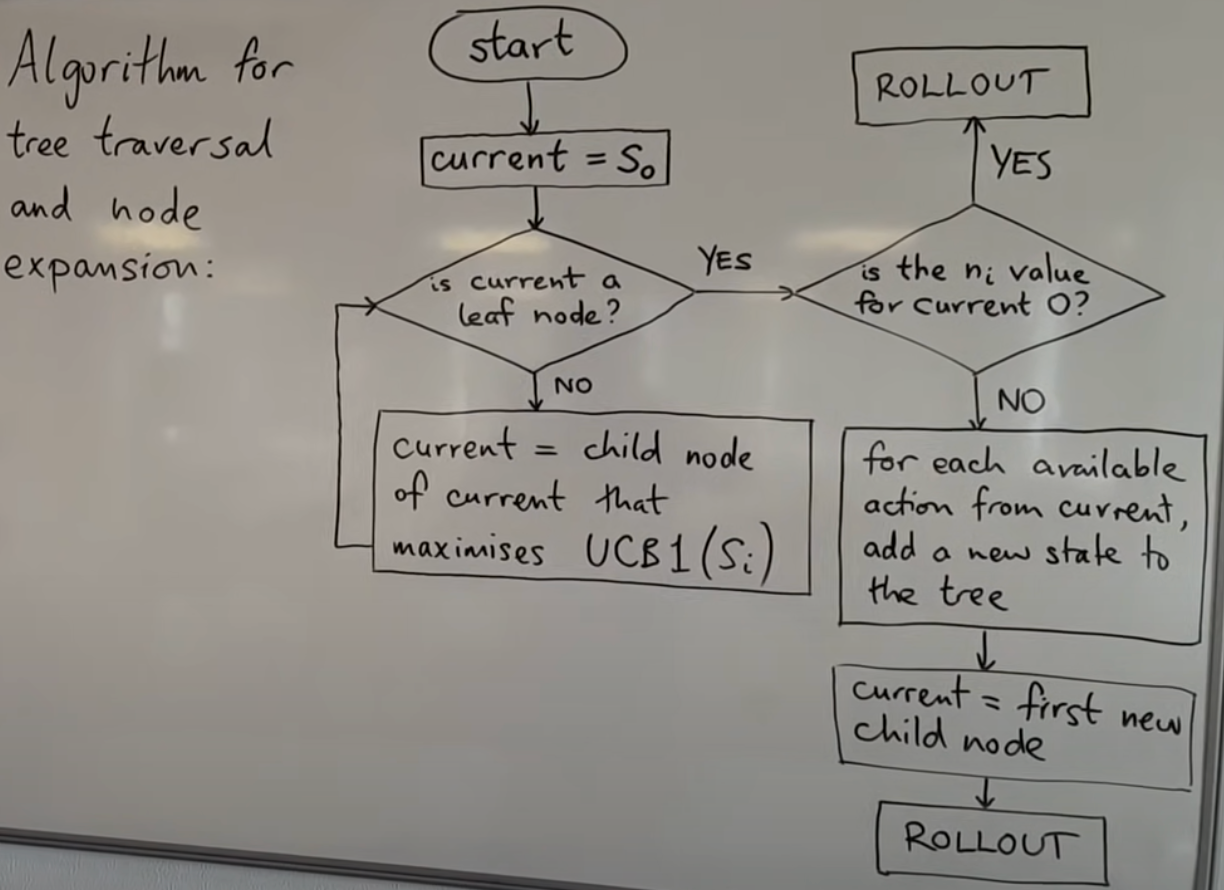

In [5]:
# https://www.youtube.com/watch?v=UXW2yZndl7U
Image('../imgs/mcts_algo.png', width=500)

# is the ni value for current is 0 (n_i=0): sampled 

In [4]:
Image(url='../imgs/rollout.png', width=500)

## worked example

In [9]:
Image(url='../imgs/mcts_exam_1.png', width=400)

In [10]:
Image(url='../imgs/mcts_exam_2.png', width=400)

In [13]:
print('left', 20/1 + 2*np.sqrt(np.log(2)/1))
print('right', 10/1 + 2*np.sqrt(np.log(2)/1))

left 21.665109222315394
right 11.665109222315396


In [11]:
Image(url='../imgs/mcts_exam_3.png', width=400)

In [14]:
# left child tree
print(20/2 + 2*np.sqrt(np.log(3)/2))
# right child tree
print(10/1 + 2*np.sqrt(np.log(3)/1))

# select right child 

11.482303807367511
12.09629414793641


In [12]:
Image(url='../imgs/mcts_exam_4.png', width=400)

In [6]:
# left child tree
print(10 + 2*np.sqrt(np.log(4)/2))
# right child tree
print(12 + 2*np.sqrt(np.log(4)/2))

# select right child 

11.665109222315396
13.665109222315396


## game tree example

- 白子/黑子，game，围棋（Go，AlphaGo）
    - 19*19 = 361
    - 博弈树：minimax tree
- 这里根节点（root）的视角是黑子；
    - 黑子，白子，胜负的换算比较简单：`总次数 - 黑子赢次数 = 白子赢的次数`

In [22]:
Image(url='../../../imgs/2880px-MCTS_(English).svg.png', width=600)

In [15]:
from graphviz import Digraph
from IPython.display import display

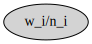

In [20]:
graph = Digraph('mcts')
graph.node('s0', 'w_i/n_i', style='filled')
display(graph)

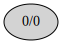

In [21]:
graph = Digraph('mcts')
graph.node('s0', '0/0', style='filled')
display(graph)

In [23]:
# 只选择 2 个 children

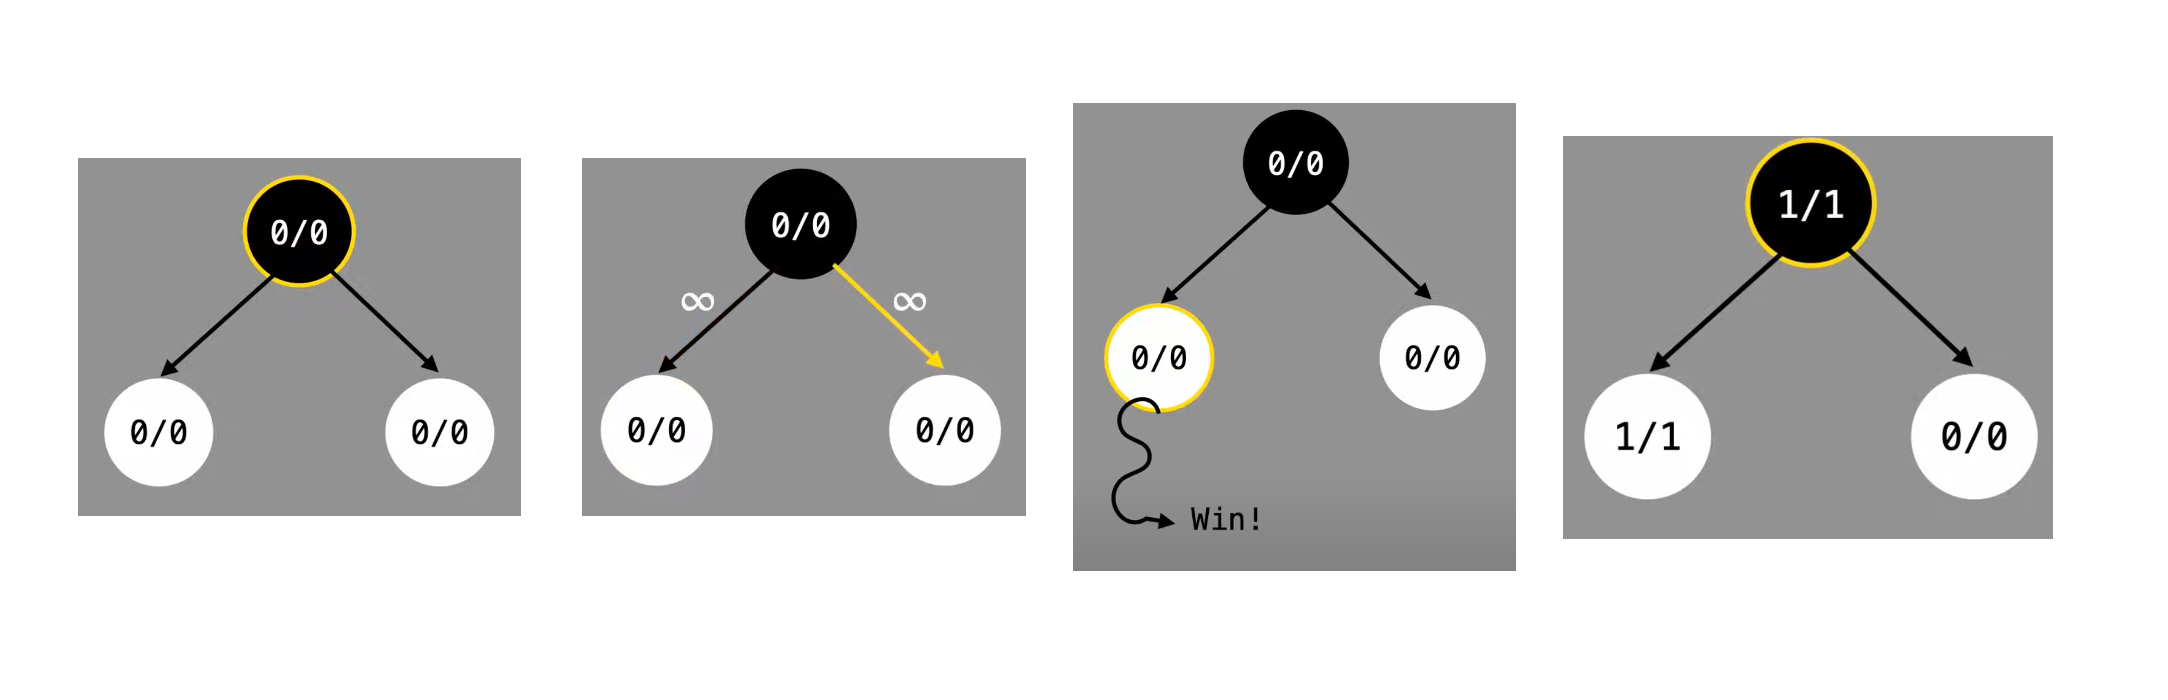

In [32]:
Image('../imgs/game_mcts_1.png', width=400)

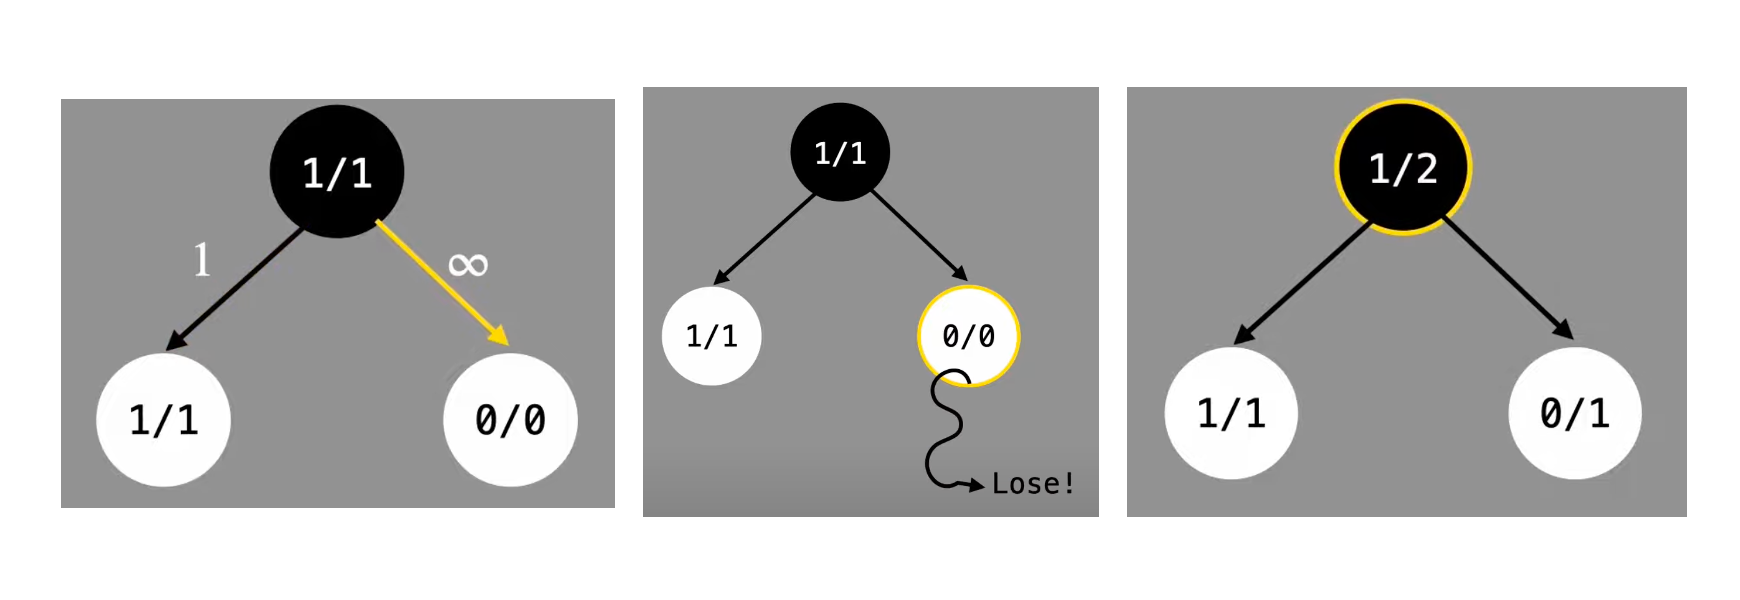

In [27]:
Image('../imgs/game_mcts_2.png', width=400)

In [33]:
def ucb(wi, ni, Ni, C=np.sqrt(2)):
    return wi/ni + C*np.sqrt(np.log(Ni)/ni)

In [31]:
print('left', ucb(1, 1, 2))
print('right', ucb(0, 1, 2))

left 2.177410022515475
right 1.1774100225154747


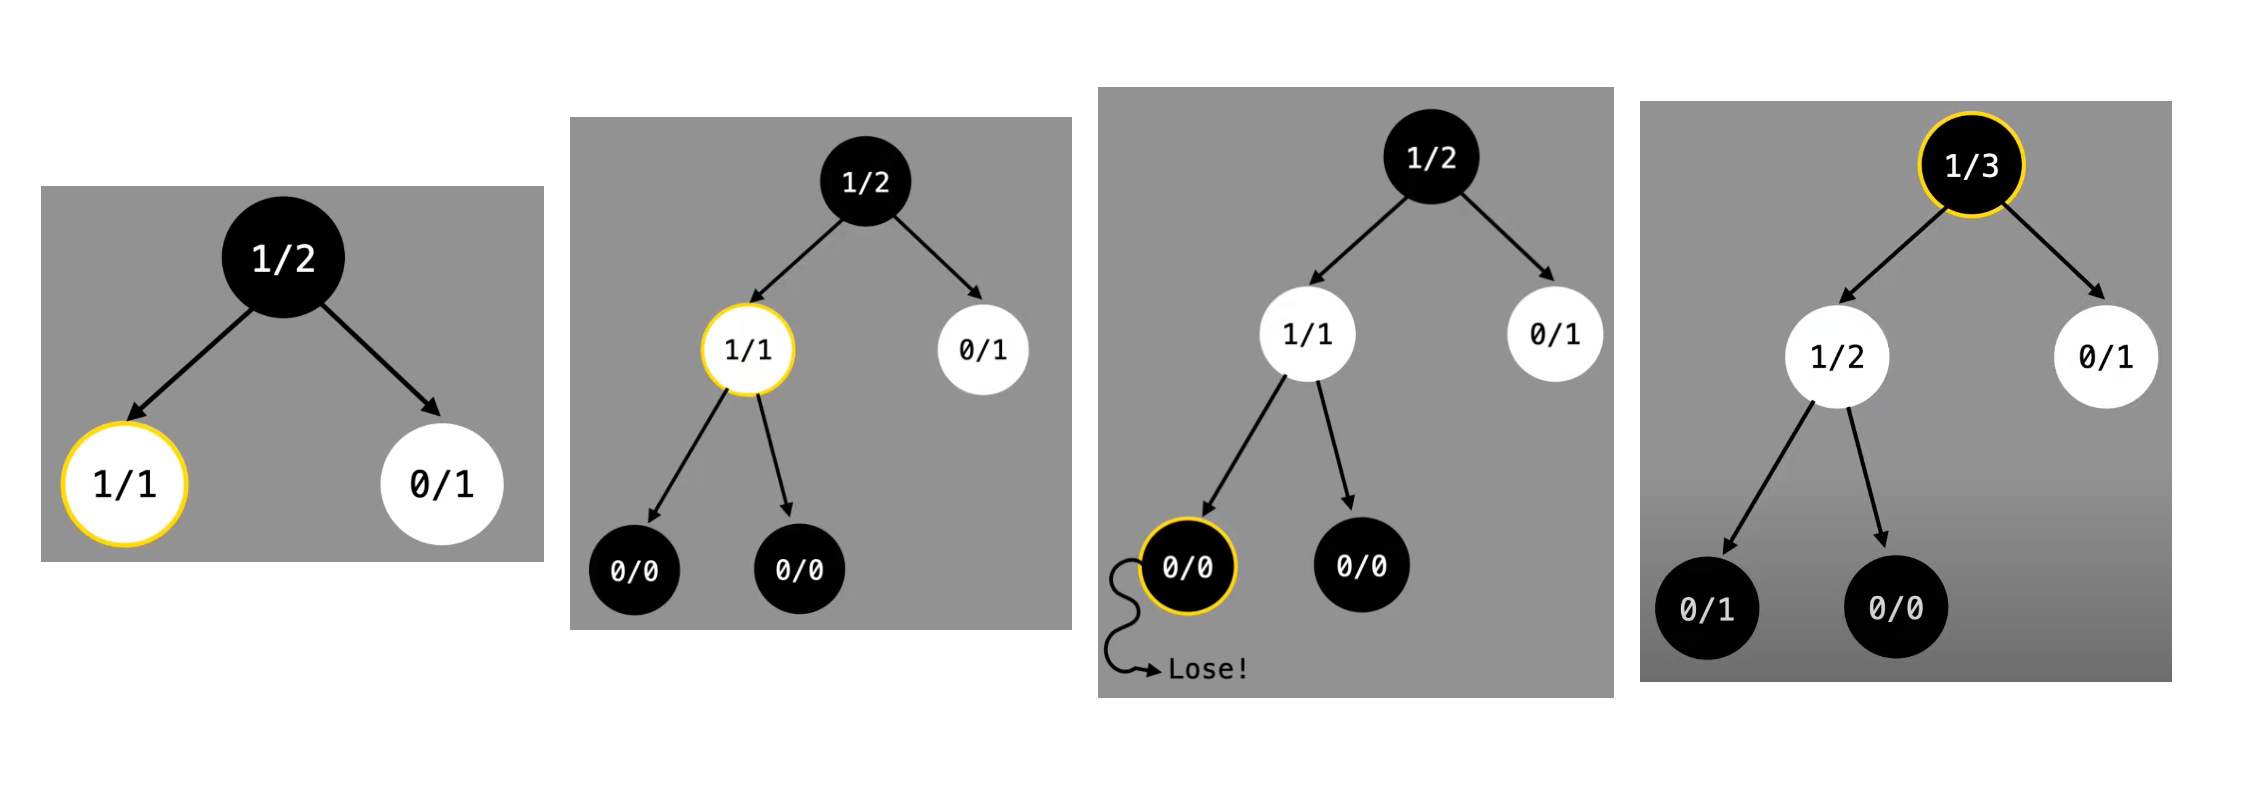

In [34]:
Image('../imgs/game_mcts_3.png', width=400)

In [40]:
# level 1 
print('left', ucb(1, 2, 3))
print('right', ucb(0, 1, 3))
# choose left

# level 2，切换成白子赢的次数
print('left', ucb(1, 1, 2))

left 1.548147073968205
right 1.482303807367511
left 2.177410022515475


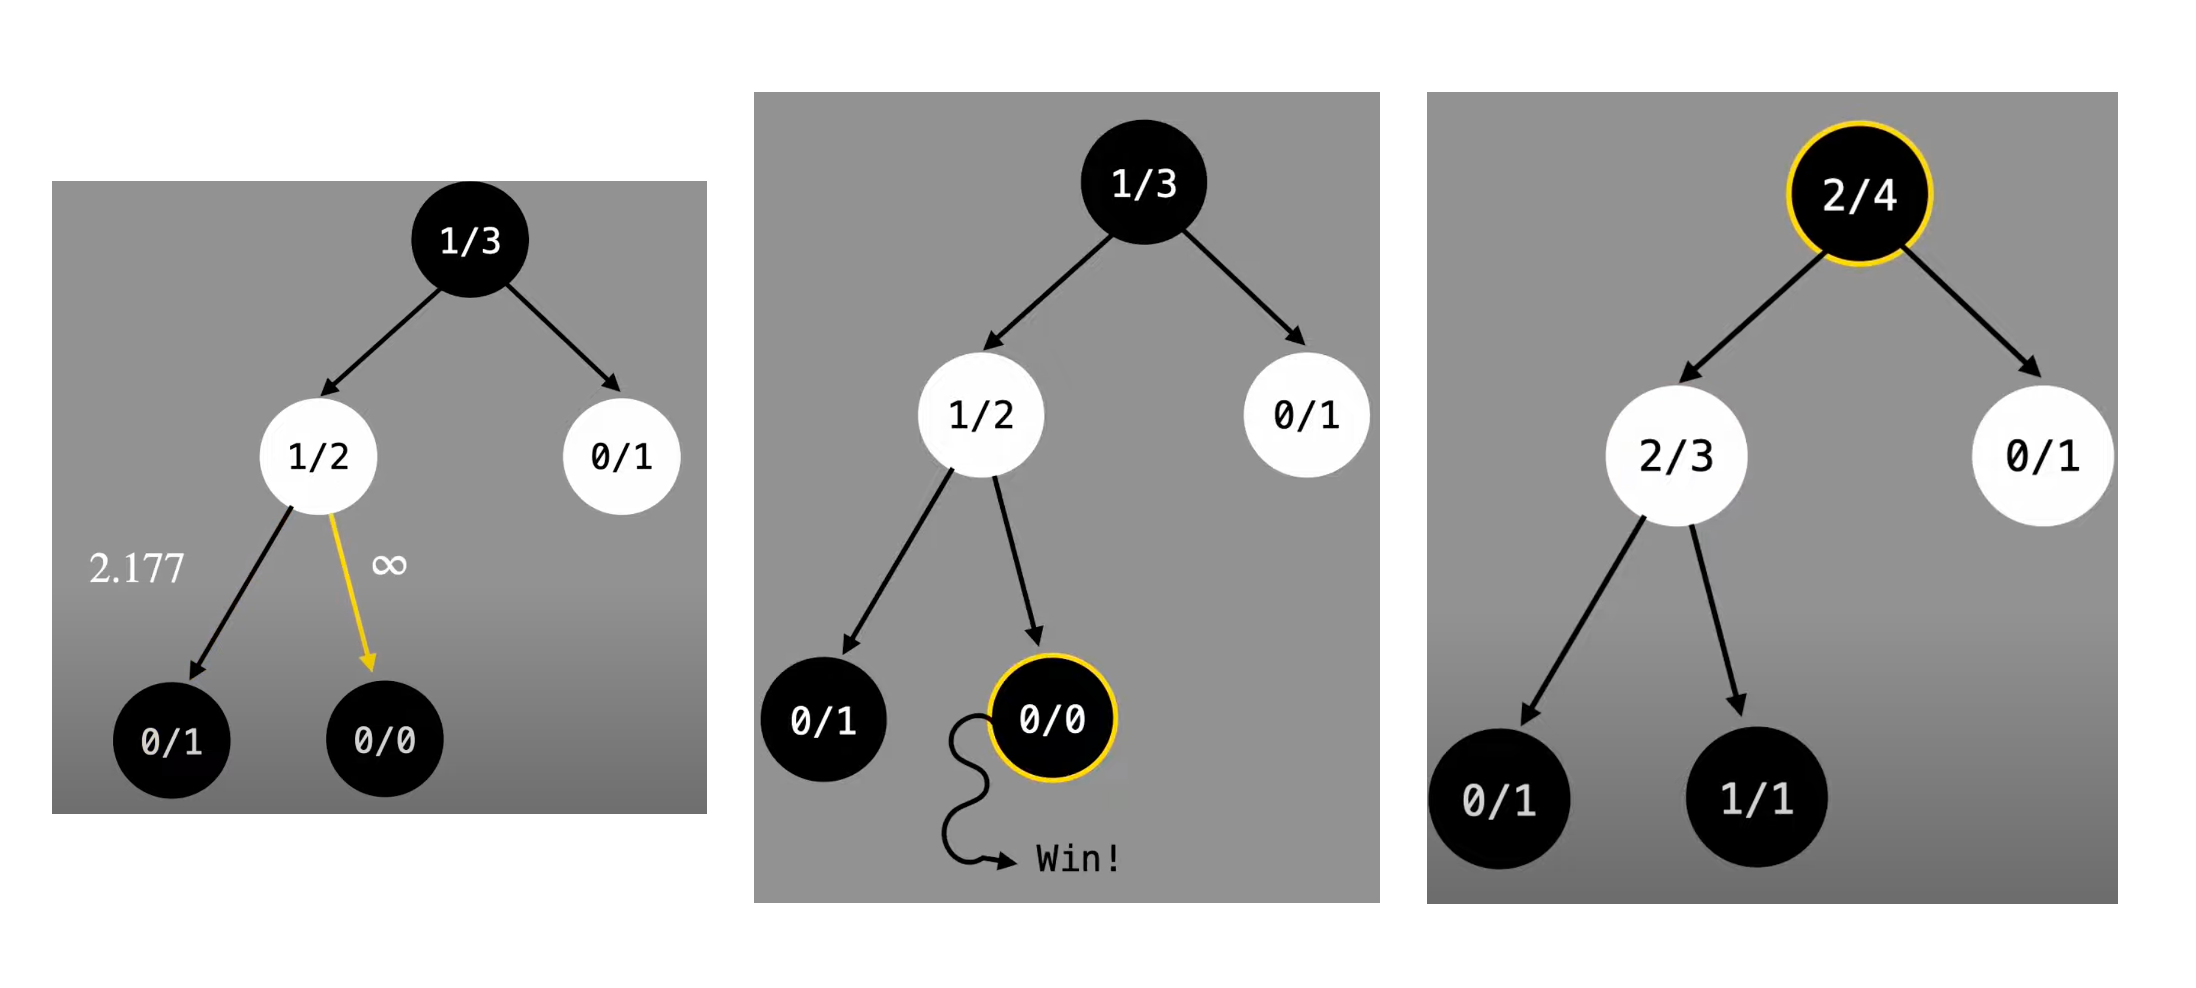

In [38]:
Image('../imgs/game_mcts_4.png', width=400)

In [41]:
# 实际决策或者planning的时候，只贪心地考虑胜率，w_i/n_i